# Fetal Health Classification using Logistic Regression, Naive Bayes, and Support Vector Machine

## imports and data

https://www.kaggle.com/andrewmvd/fetal-health-classification

This dataset contains 2126 records of features extracted from Cardiotocogram exams, which were then classified by three expert obstetritians into 3 classes:
- Normal = 1
- Suspect = 2
- Pathological = 3

In [1]:
import pandas as pd
from sklearn import metrics
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


## data preparation
- add patient_name column
- convert "fetal_heatlh" column into readable descriptions
- balance the class, since there is a class imbalance from the large number of normal health

In [2]:
# import raw data
data = pd.read_csv("data/fetal_health.csv")
data

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [3]:
# adding patient name to data
data.insert(0, 'patient_name', [(lambda x: 'p' + str(x+1).zfill(4))(i) for i in data.index]) # gets the index number and add p in front
data

,patient_name,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,p0001,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,p0002,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,p0003,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,p0004,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,p0005,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,p2122,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,p2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,p2124,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,p2125,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [4]:
# list number of class category
data.fetal_health.unique()

array([2., 1., 3.])

In [5]:
# class imbalance
# 1 == normal = 1655
# 2 == suspect = 295
# 3 == pathological = 176
data.groupby('fetal_health').count()

,patient_name,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
fetal_health,,,,,,,,,,,,,,,,,,,,,
1.0,1655,1655,1655,1655,1655,1655,1655,1655,1655,1655,...,1655,1655,1655,1655,1655,1655,1655,1655,1655,1655
2.0,295,295,295,295,295,295,295,295,295,295,...,295,295,295,295,295,295,295,295,295,295
3.0,176,176,176,176,176,176,176,176,176,176,...,176,176,176,176,176,176,176,176,176,176


In [6]:
# extract fetal health = 1
data1 = data.loc[data['fetal_health'] == 1.0]
data23 = data.loc[data['fetal_health'] != 1.0]
print("health = 1      :: ",len(data1))
print("health = 2 & 3  :: ", len(data23))

# set our sample to 1000 only
# count of data1 = 1000 - count of data23
data1 = data1[:(1000 - len(data23))]
data1

health = 1      ::  1655
health = 2 & 3  ::  471


,patient_name,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
1,p0002,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,p0003,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,p0004,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,p0005,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
12,p0013,131.0,0.005,0.072,0.008,0.003,0.0,0.0,28.0,1.4,...,88.0,154.0,5.0,0.0,135.0,134.0,137.0,7.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
850,p0851,138.0,0.001,0.000,0.004,0.000,0.0,0.0,43.0,0.7,...,131.0,156.0,0.0,0.0,142.0,142.0,144.0,1.0,0.0,1.0
851,p0852,138.0,0.002,0.000,0.005,0.000,0.0,0.0,45.0,0.7,...,131.0,156.0,0.0,0.0,147.0,145.0,146.0,2.0,0.0,1.0
852,p0853,138.0,0.000,0.000,0.004,0.000,0.0,0.0,39.0,0.8,...,131.0,154.0,2.0,0.0,142.0,141.0,143.0,1.0,0.0,1.0
853,p0854,138.0,0.000,0.000,0.001,0.000,0.0,0.0,41.0,0.7,...,129.0,154.0,2.0,0.0,140.0,140.0,141.0,1.0,0.0,1.0


In [7]:
# make new data and make fetla health readable
data = data1.append(data23)
data.fetal_health.loc[data['fetal_health'] == 1.0] = 'Normal'
data.fetal_health.loc[data['fetal_health'] == 2.0] = 'Suspected'
data.fetal_health.loc[data['fetal_health'] == 3.0] = 'Pathological'

data

/home/ian/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,patient_name,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
1,p0002,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,Normal
2,p0003,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,Normal
3,p0004,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,Normal
4,p0005,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,Normal
12,p0013,131.0,0.005,0.072,0.008,0.003,0.0,0.0,28.0,1.4,...,88.0,154.0,5.0,0.0,135.0,134.0,137.0,7.0,1.0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2086,p2087,133.0,0.000,0.003,0.006,0.000,0.0,0.0,74.0,1.3,...,119.0,150.0,7.0,0.0,136.0,134.0,137.0,1.0,0.0,Suspected
2121,p2122,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,Suspected
2122,p2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,Suspected
2123,p2124,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,Suspected


<AxesSubplot:>

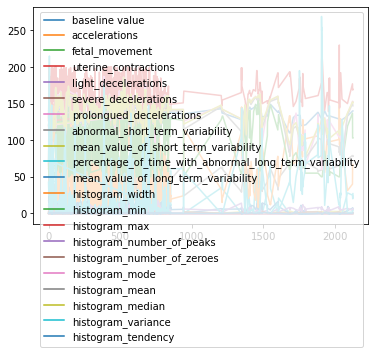

In [8]:
data.plot()

## Preprocessing

In [9]:
# column names
class_col = data.columns.to_list()[1:-1]
class_col

['baseline value',
 'accelerations',
 'fetal_movement',
 'uterine_contractions',
 'light_decelerations',
 'severe_decelerations',
 'prolongued_decelerations',
 'abnormal_short_term_variability',
 'mean_value_of_short_term_variability',
 'percentage_of_time_with_abnormal_long_term_variability',
 'mean_value_of_long_term_variability',
 'histogram_width',
 'histogram_min',
 'histogram_max',
 'histogram_number_of_peaks',
 'histogram_number_of_zeroes',
 'histogram_mode',
 'histogram_mean',
 'histogram_median',
 'histogram_variance',
 'histogram_tendency']

In [10]:
x = data[class_col] # get all classification column except fetal_health
y = data['fetal_health'] # get the classification class
print(x)
print(y)

      baseline value  accelerations  fetal_movement  uterine_contractions  \
1              132.0          0.006           0.000                 0.006   
2              133.0          0.003           0.000                 0.008   
3              134.0          0.003           0.000                 0.008   
4              132.0          0.007           0.000                 0.008   
12             131.0          0.005           0.072                 0.008   
...              ...            ...             ...                   ...   
2086           133.0          0.000           0.003                 0.006   
2121           140.0          0.000           0.000                 0.007   
2122           140.0          0.001           0.000                 0.007   
2123           140.0          0.001           0.000                 0.007   
2124           140.0          0.001           0.000                 0.006   

      light_decelerations  severe_decelerations  prolongued_decelerations  

In [11]:
# split the data for train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8)

In [12]:

# showing the size of data
print("x_train size=",x_train.size)
print("x_test size",x_test.size)
print("y_train size", y_train.size)
print("y_test size", y_test.size)

x_train size= 16800
x_test size 4200
y_train size 800
y_test size 200


In [13]:
# variable sample
x_train.sample(5)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
1371,144.0,0.000,0.000,0.008,0.00,0.000,0.0,61.0,0.4,10.0,...,20.0,136.0,156.0,2.0,0.0,148.0,146.0,148.0,1.0,0.0
389,129.0,0.008,0.054,0.002,0.00,0.000,0.0,37.0,1.3,0.0,...,140.0,55.0,195.0,7.0,4.0,186.0,151.0,144.0,177.0,0.0
708,130.0,0.000,0.000,0.007,0.00,0.000,0.0,55.0,0.5,11.0,...,20.0,124.0,144.0,1.0,0.0,133.0,132.0,134.0,0.0,0.0
1794,121.0,0.000,0.001,0.003,0.01,0.001,0.0,68.0,2.1,0.0,...,102.0,55.0,157.0,3.0,1.0,67.0,79.0,82.0,83.0,-1.0
729,120.0,0.005,0.020,0.005,0.00,0.000,0.0,50.0,0.7,7.0,...,94.0,60.0,154.0,2.0,0.0,123.0,126.0,125.0,10.0,1.0


In [14]:
# class label sample
y_train.sample(5)

489       Normal
808       Normal
593       Normal
814       Normal
442    Suspected
Name: fetal_health, dtype: object

## Training
- will create the training funciton here which needs the splitted data and the type of classifer to be used
- this will return prediction comparison, classification report(i.e. accuracy, f1-score, ...), and the confusion matrix

In [15]:
def classifier_func(x_train, x_test, y_train, y_test, clf):
    # train and predict
    clf.fit(x_train,y_train)
    pred = clf.predict(x_test)
    # compare
    name = data['patient_name'].loc[y_test.index]
    pred_compare = pd.DataFrame({'Name' : name, 'Truth': y_test, 'Prediction': pred})
    pred_compare.reset_index(drop=True, inplace=True)

    # clf report
    clf_rep = classification_report(y_test, pred)
    # matrix
    cnf_matrix = metrics.confusion_matrix(y_test, pred)

    return pred_compare, clf_rep, cnf_matrix


## Visualization 
- this will show our raw confusion matrix into a better visualization using seaborn

In [16]:
def visualize_matrix(cnf_matrix, classifier_name):
        plt.figure(figsize = (10,7))
        sns.set(font_scale=1.5)
        ax = sns.heatmap(cnf_matrix, annot=True,
                        xticklabels= ['Normal', 'Suspect', 'Pathological'],
                        yticklabels= ['Normal', 'Suspect', 'Pathological'])
        ax.set(xlabel = "Predicted Label", ylabel = "Actual Label", title=f"Fetal Health Prediction ({classifier_name})")


# CLASSIFIERS

## LOGISTIC REGRESSION

In [17]:
from sklearn.linear_model import LogisticRegression

logreg_pred, logreg_clf_rep, logreg_cnf_matrix = classifier_func(x_train, x_test, y_train, y_test, LogisticRegression())

/home/ian/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
logreg_pred

,Name,Truth,Prediction
0,p0746,Normal,Normal
1,p0447,Suspected,Suspected
2,p1960,Pathological,Pathological
3,p0669,Suspected,Suspected
4,p0462,Suspected,Suspected
...,...,...,...
195,p0253,Normal,Suspected
196,p0762,Normal,Suspected
197,p0648,Suspected,Pathological
198,p0223,Normal,Normal


In [19]:
print(logreg_clf_rep)

              precision    recall  f1-score   support

      Normal       0.85      0.91      0.88       103
Pathological       0.89      0.69      0.77        35
   Suspected       0.71      0.73      0.72        62

    accuracy                           0.81       200
   macro avg       0.82      0.77      0.79       200
weighted avg       0.82      0.81      0.81       200



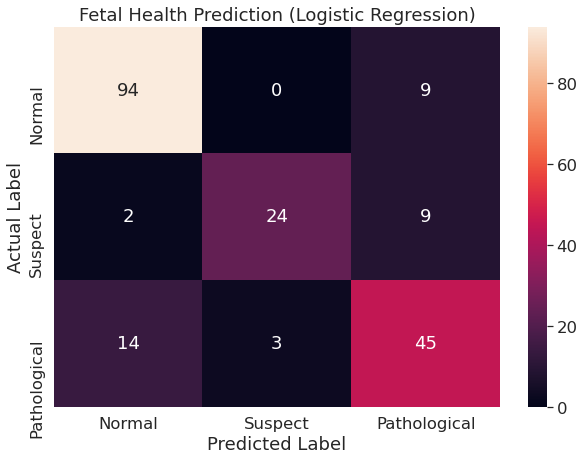

In [20]:
visualize_matrix(logreg_cnf_matrix, "Logistic Regression")

## NAIVE BAYES

In [21]:
from sklearn.naive_bayes import GaussianNB

NB_pred, NB_clf_rep, NB_cnf_matrix = classifier_func(x_train, x_test, y_train, y_test, GaussianNB())

In [22]:
NB_pred

,Name,Truth,Prediction
0,p0746,Normal,Normal
1,p0447,Suspected,Suspected
2,p1960,Pathological,Pathological
3,p0669,Suspected,Normal
4,p0462,Suspected,Pathological
...,...,...,...
195,p0253,Normal,Normal
196,p0762,Normal,Suspected
197,p0648,Suspected,Suspected
198,p0223,Normal,Normal


In [23]:
print(NB_clf_rep)

              precision    recall  f1-score   support

      Normal       0.94      0.76      0.84       103
Pathological       0.82      0.51      0.63        35
   Suspected       0.61      0.94      0.74        62

    accuracy                           0.77       200
   macro avg       0.79      0.74      0.74       200
weighted avg       0.82      0.77      0.77       200



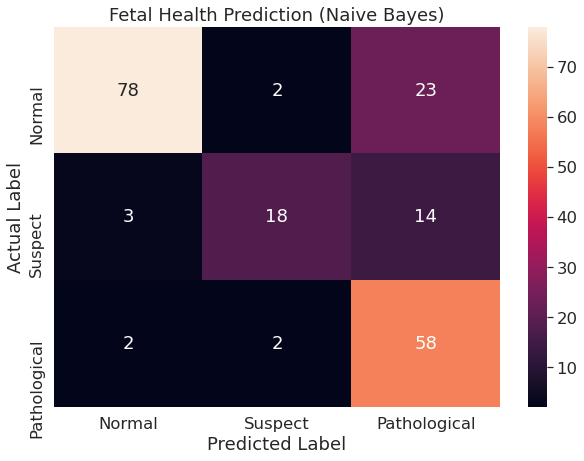

In [24]:
visualize_matrix(NB_cnf_matrix, "Naive Bayes")

## SUPPORT VECTOR MACHINE

In [25]:
from sklearn.svm import SVC

In [26]:
svm_pred, svm_clf_rep, svm_cnf_matrix = classifier_func(x_train, x_test, y_train, y_test, SVC())

In [27]:
svm_pred

,Name,Truth,Prediction
0,p0746,Normal,Normal
1,p0447,Suspected,Suspected
2,p1960,Pathological,Pathological
3,p0669,Suspected,Normal
4,p0462,Suspected,Suspected
...,...,...,...
195,p0253,Normal,Normal
196,p0762,Normal,Normal
197,p0648,Suspected,Pathological
198,p0223,Normal,Normal


In [28]:
print(svm_clf_rep)

              precision    recall  f1-score   support

      Normal       0.85      0.93      0.89       103
Pathological       0.90      0.51      0.65        35
   Suspected       0.70      0.76      0.73        62

    accuracy                           0.81       200
   macro avg       0.82      0.73      0.76       200
weighted avg       0.81      0.81      0.80       200



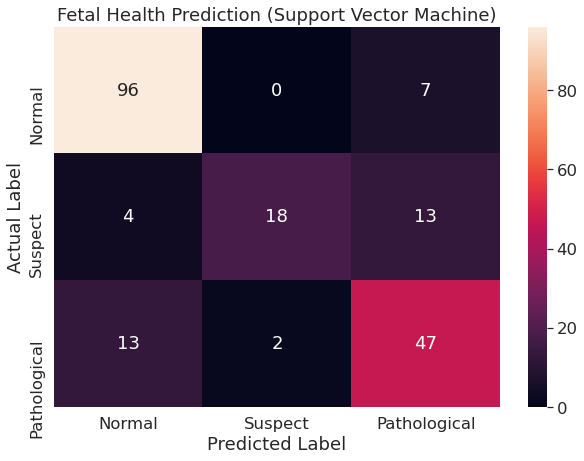

In [29]:
visualize_matrix(svm_cnf_matrix, "Support Vector Machine")